In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
from datetime import datetime
from matplotlib.text import Text
from matplotlib.legend_handler import HandlerBase
import matplotlib as mpl
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', -1)
plt.style.use('fivethirtyeight')
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Imputer
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import pickle
from sklearn.metrics import accuracy_score

In [2]:
train=pd.read_csv("./BlackFriday.csv")
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Check for missing values

### Replace NaN with 0

In [3]:
train = train.fillna(0)

# Linear Regression

### 'Purchase' is the variable that we need to predict, so let's do some analysis on it. let's take a look at the distribution of it

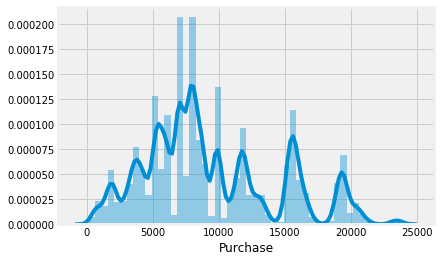

In [4]:
sns.distplot(train['Purchase'])

In [5]:
from sklearn.preprocessing import LabelEncoder
train['Gender'] = LabelEncoder().fit_transform(train['Gender'])
train['City_Category'] = LabelEncoder().fit_transform(train['City_Category'])
train['Occupation'] = LabelEncoder().fit_transform(train['Occupation'])

In [6]:
data = train
data_corr = data.corr()
data_corr

,User_ID,Gender,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.031898,-0.023024,0.024107,0.018732,0.003687,0.003663,0.003938,0.005389
Gender,-0.031898,1.000000,0.117294,-0.004129,-0.010379,-0.045661,-0.001580,0.035813,0.060086
Occupation,-0.023024,0.117294,1.000000,0.033781,0.024691,-0.008114,0.006792,0.011941,0.021104
City_Category,0.024107,-0.004129,0.033781,1.000000,0.040173,-0.027444,0.019535,0.037751,0.068507
Marital_Status,0.018732,-0.010379,0.024691,0.040173,1.000000,0.020546,0.001146,-0.004363,0.000129
Product_Category_1,0.003687,-0.045661,-0.008114,-0.027444,0.020546,1.000000,-0.040730,-0.389048,-0.314125
Product_Category_2,0.003663,-0.001580,0.006792,0.019535,0.001146,-0.040730,1.000000,0.090284,0.038395
Product_Category_3,0.003938,0.035813,0.011941,0.037751,-0.004363,-0.389048,0.090284,1.000000,0.284120
Purchase,0.005389,0.060086,0.021104,0.068507,0.000129,-0.314125,0.038395,0.284120,1.000000


In [7]:
test = train.sample(frac = 0.2, random_state = 42)
X = train[['Gender','Marital_Status','City_Category','Occupation']]
y = train['Purchase']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

In [9]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [10]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [11]:
y_pred = regressor.predict(X_test)

### Performing Linear Regression without any changes to the dataset

In [12]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.008782187184560142

In [13]:
regressor.predict([[1,0,1,5]])

array([10257.57481993])

In [14]:
test = train.sample(frac = 0.2, random_state = 42)
X = train[['Purchase','Marital_Status','City_Category','Occupation']]
y = train['Gender']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [17]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.752774940985418

In [18]:
from sklearn import tree
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [19]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.6685082564609108

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
clf = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [21]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.7681940700808625

In [22]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB(priors=None)

In [23]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.752774940985418

In [24]:
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=1.0)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [25]:
y_pred = clf.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
accuracy_score(y_test, y_pred)

0.752774940985418